<b><h1 style="font-size:40px; color:red;">BANK MARKETING</h1></b>

<b style="font-size:25px;">Table of Contents</b>
1. Introduction
2. Objective
3. Data Story
4. Data Loading and Preprocessing
5. Exploratory Data Analysis
6. Feature Engineering
7. Split Dataset into Training set and Test set
8. Model Training
9. Hyperparameter Tuning
10. Model Building
11. Pipeline Building
12. Model Saving
13. Test with Unseen Data
14. Conclusion
15. Future Work

<b style="font-size:25px;">1. Introduction</b>

<p>Bank marketing is <b>the design structure, layout and delivery of customer-needed services worked out by checking out the corporate objectives of the bank and environmental constraints.,</b><br><br>
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.<br><br>
The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal—if they give several days notification. Also, there will be a penalty assessed for early termination.</p>

<b style="font-size:25px;">2. Objective</b>

<p>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not (no) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).</p>

<h1 style="font-size:25px;"><b>3. Data story</b></h1>

The dataset serves as a historical record, encompassing attributes like age, job, marital status, and education, intertwined with campaign-specific details. At the heart of the dataset lies the binary target variable: did the client subscribe to a term deposit?

Visual explorations revealed distributions, tendencies, and outliers. For instance, we spotted patterns in job types and their propensity to subscribe.

Deeper look at its features:
1. <b>age</b>: Age of the client.
2. <b>job</b>: Type of job.
3. <b>marital</b>: Marital status.
4. <b>education</b>: Level of education.
5. <b>default</b>: Whether the client has credit in default.
6. <b>balance</b>: Average yearly balance in euros.
7. <b>housing</b>: Whether the client has a housing loan.
8. <b>loan</b>: Whether the client has a personal loan.
9. <b>contact</b>: Type of communication used for the last contact.
10. <b>day</b>: Last contact day of the month.
11. <b>month</b>: Last contact month of the year.
12. <b>duration</b>: Duration of the last contact in seconds.
13. <b>campaign</b>: Number of contacts performed during this campaign.
14. <b>pdays</b>: Number of days since the client was last contacted from a previous campaign.
15. <b>previous</b>: Number of contacts performed before this campaign.
16. <b>poutcome</b>: Outcome of the previous marketing campaign.
17. <b>deposit</b>: Target variable (whether the client subscribed to a term deposit).

Data Set Link:
https://archive.ics.uci.edu/dataset/222/bank+marketing

<h1 style="font-size:25px;"><b>4. Data Loading and Preprocessing</b></h1>

In [838]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [840]:
#Load Dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [842]:
#check the number of rows and columns
df.shape

(11162, 17)

Number of rows = 11162<br>
Number of columns = 17

In [845]:
#check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Columns of different datatypes are present in this dataframe

In [848]:
#describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Statistical details of the dataframe.

<h1 style="font-size:25px;"><b>5. Exploratory Data Analysis</b></h1>

In [852]:
#categorical features and its unique values
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=="O") & (feature not in ["deposit"]))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']


- There is 9 Categorical features.<br>


In [855]:
#Checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Dataset does not contain null value.

In [858]:
#checking duplicates
df.duplicated().sum()

0

There is no duplicates in this dataset.

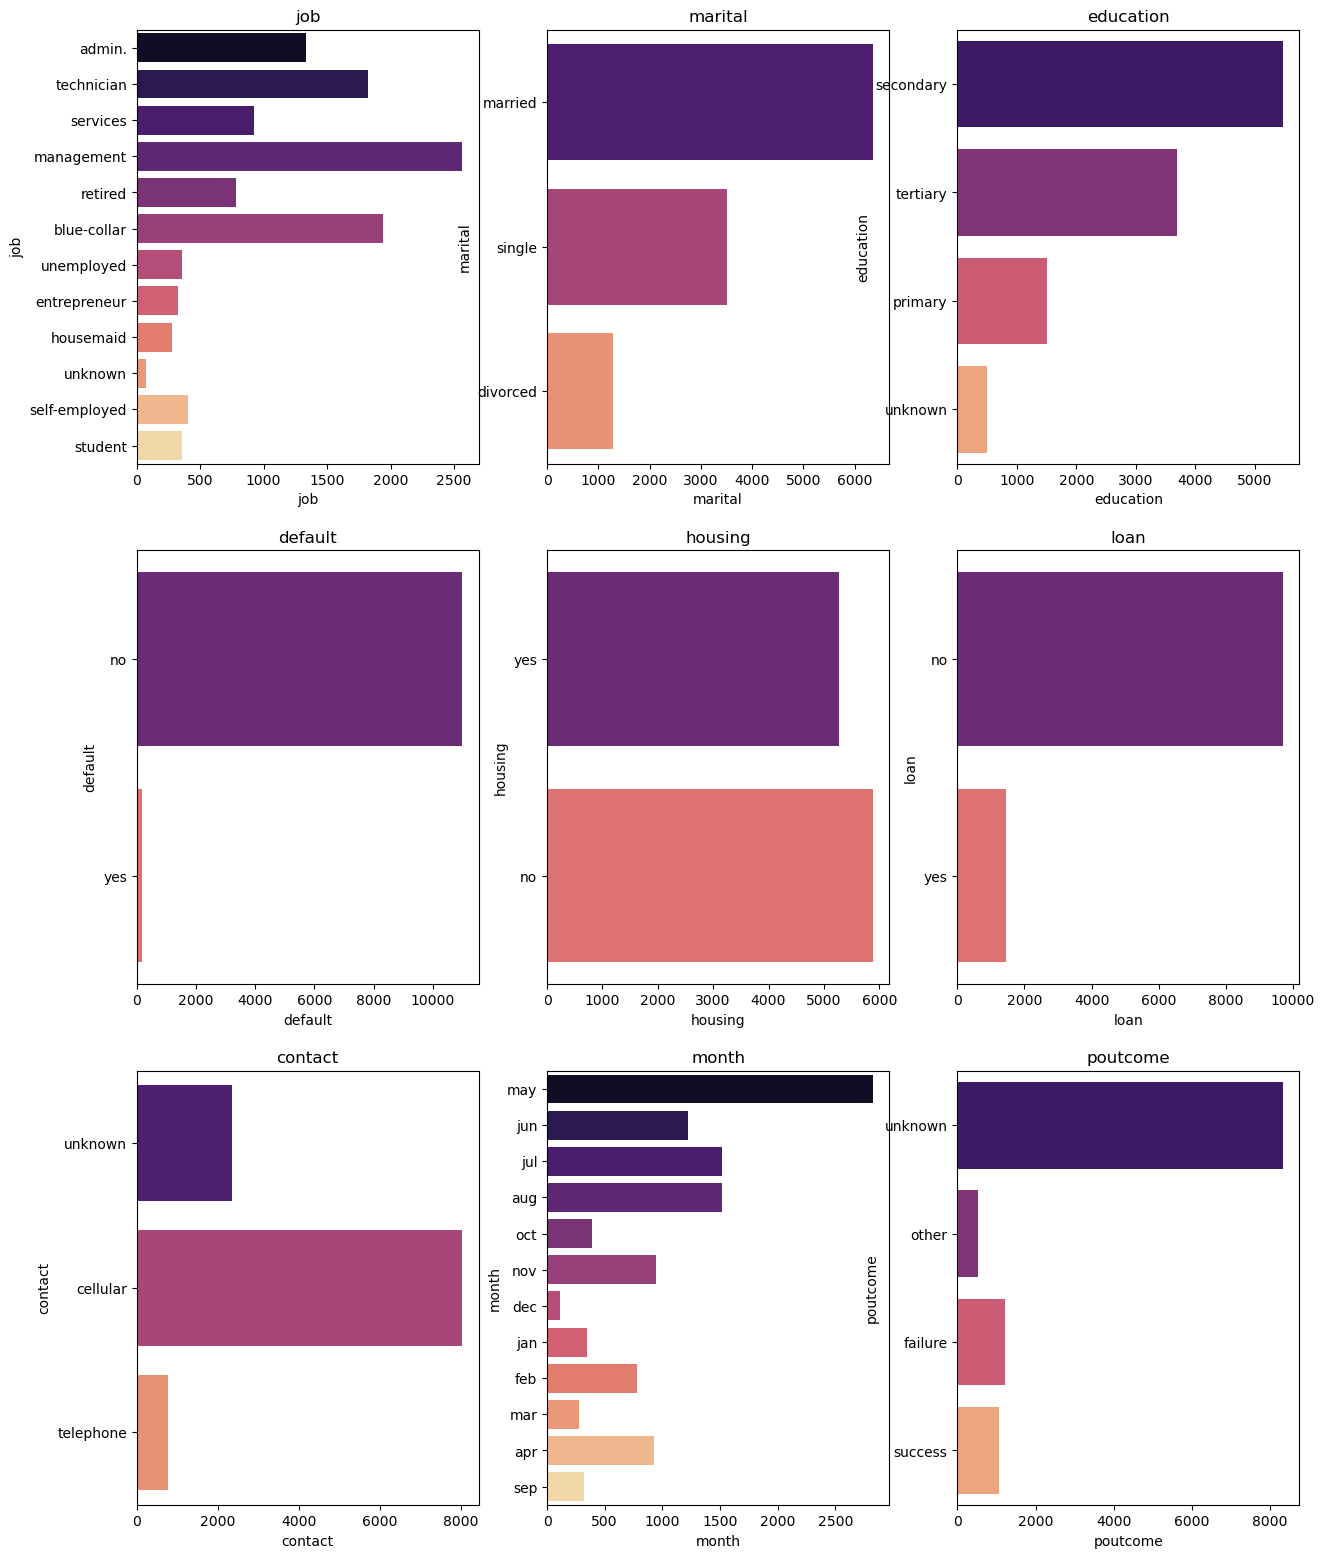

In [861]:
#check count based on categorical feature
plt.figure(figsize=(15,80), facecolor="white")
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df,palette="magma")
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- Client with job type as management records are high in given dataset and housemaid are very less.
- Client who married are high in records in given dataset and divorced are very less.
- Client whoes education background is secondary are in high numbers in given datasets
- default feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

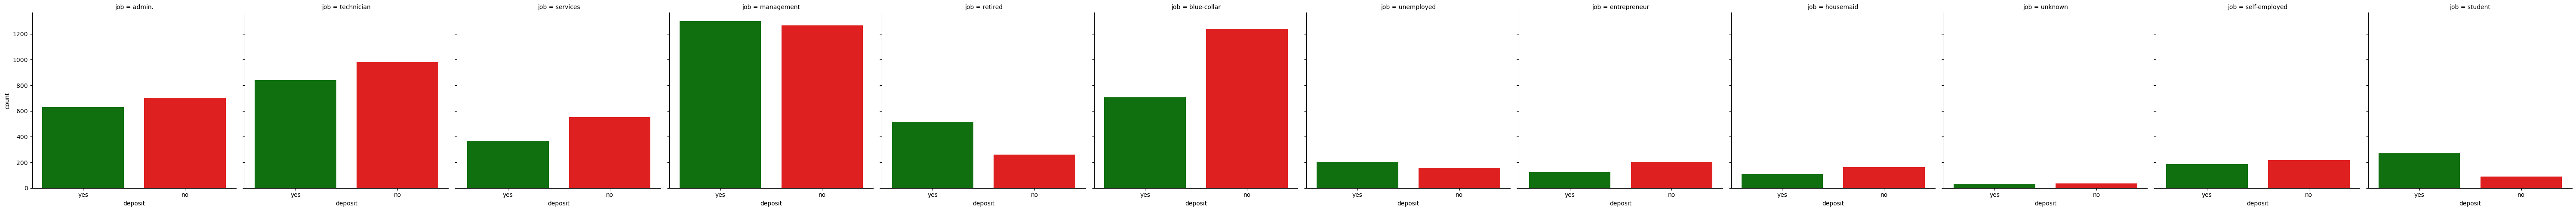

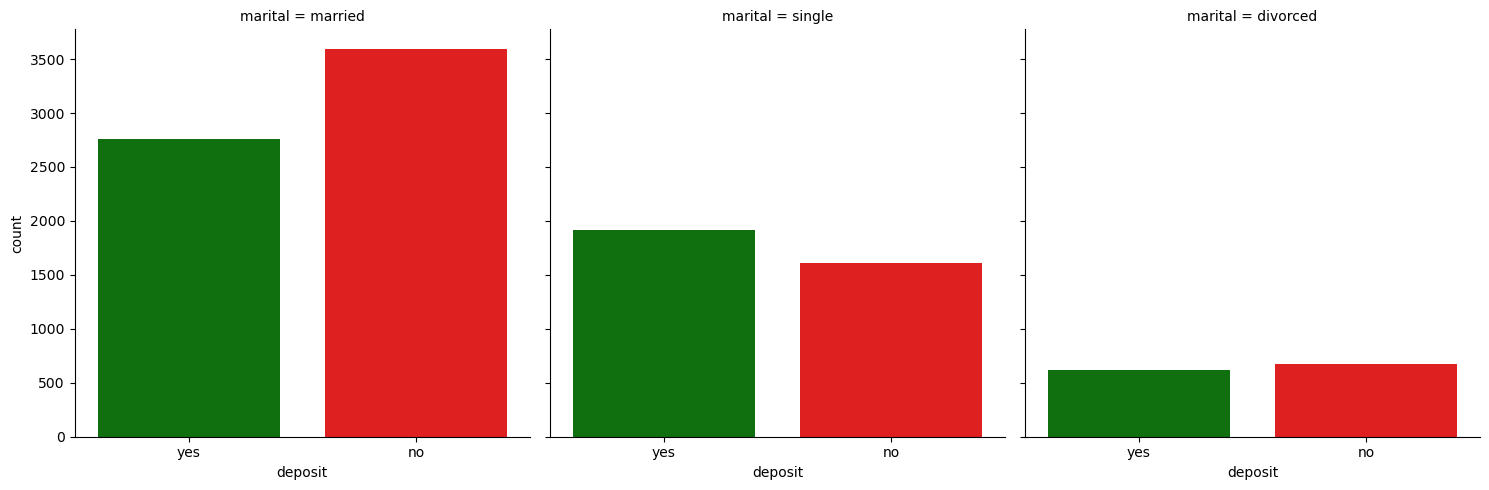

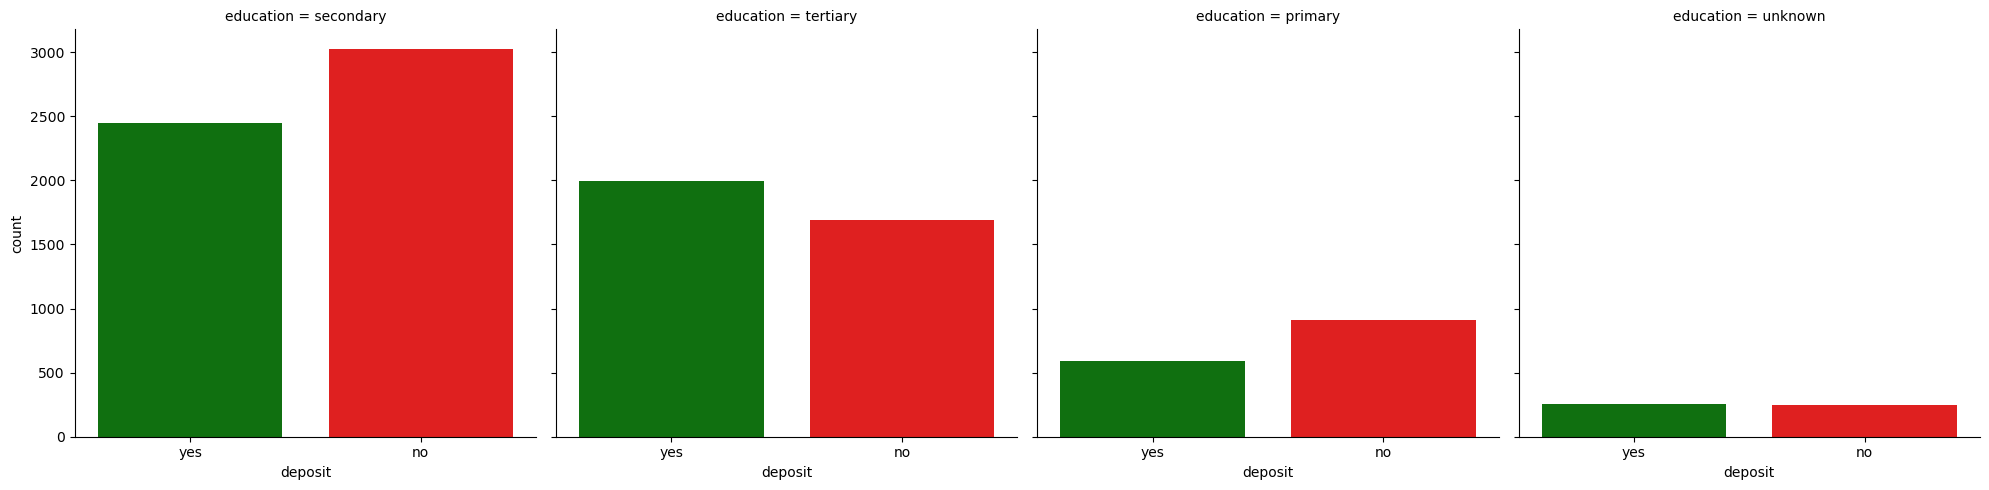

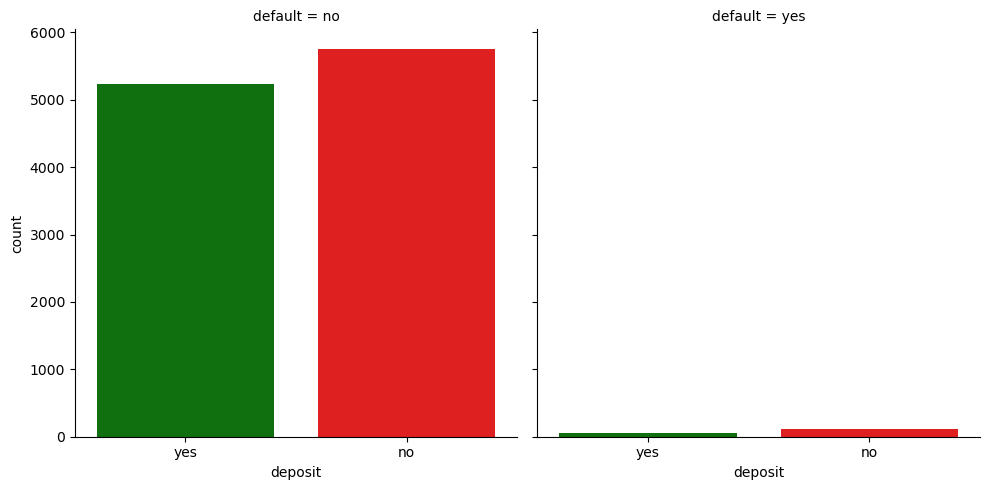

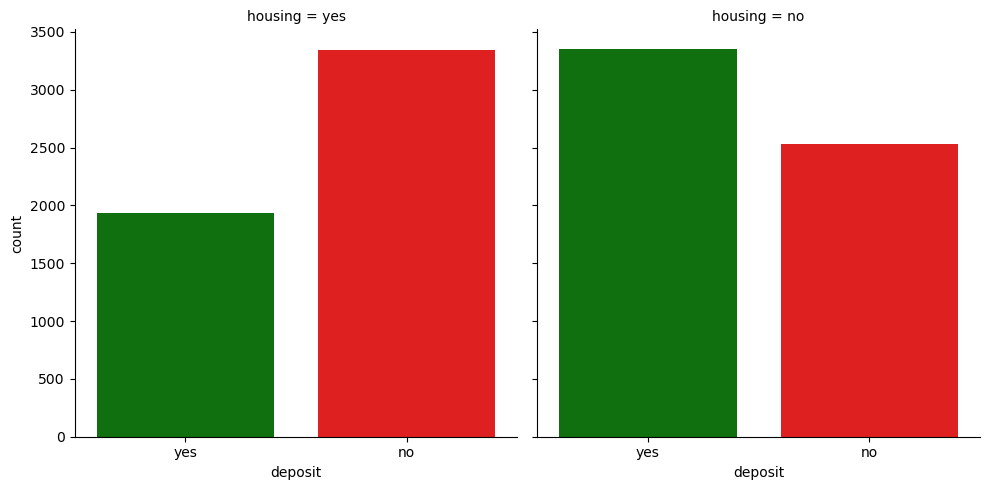

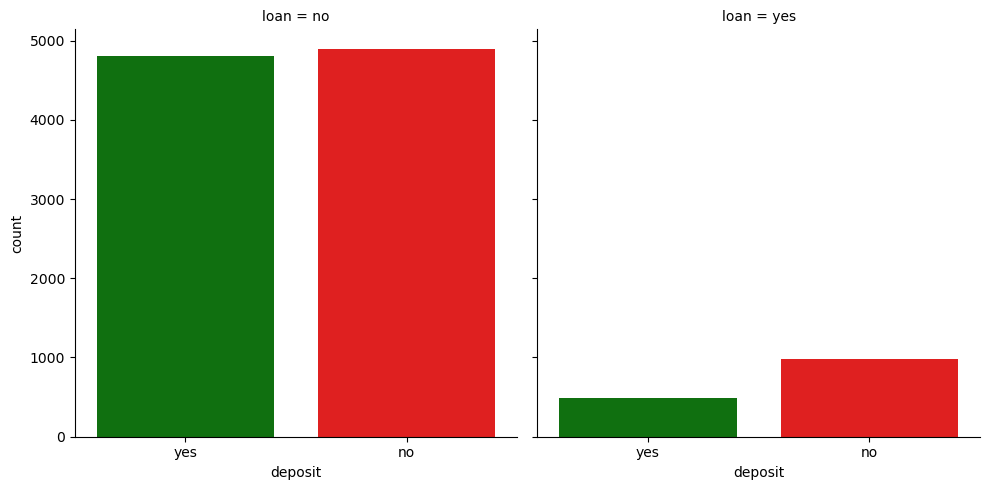

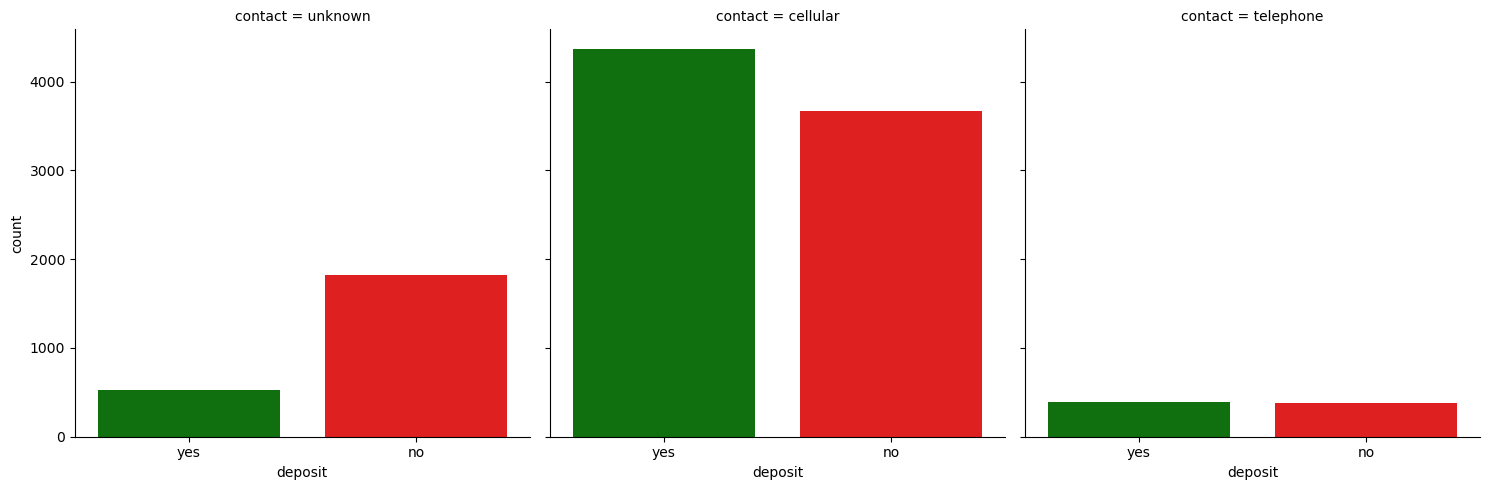

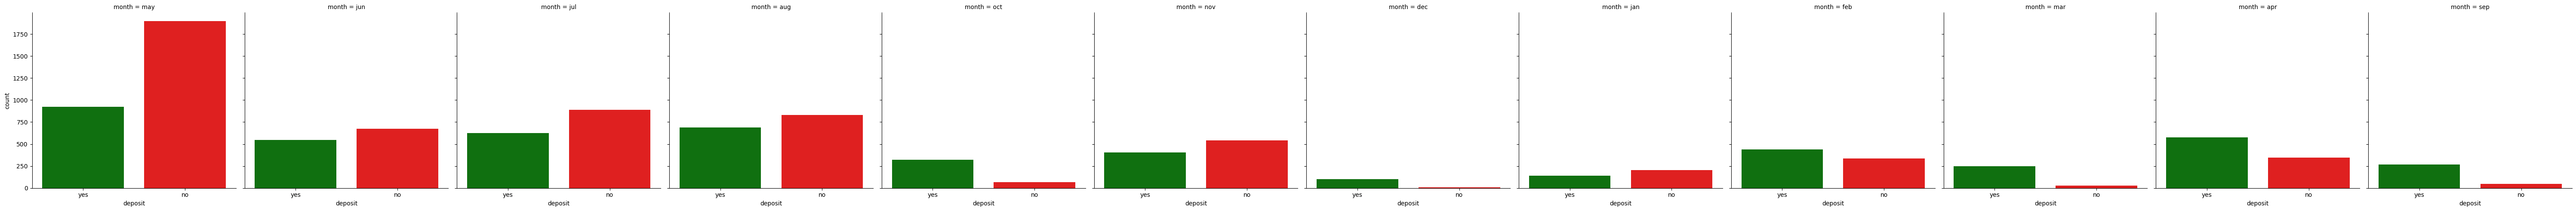

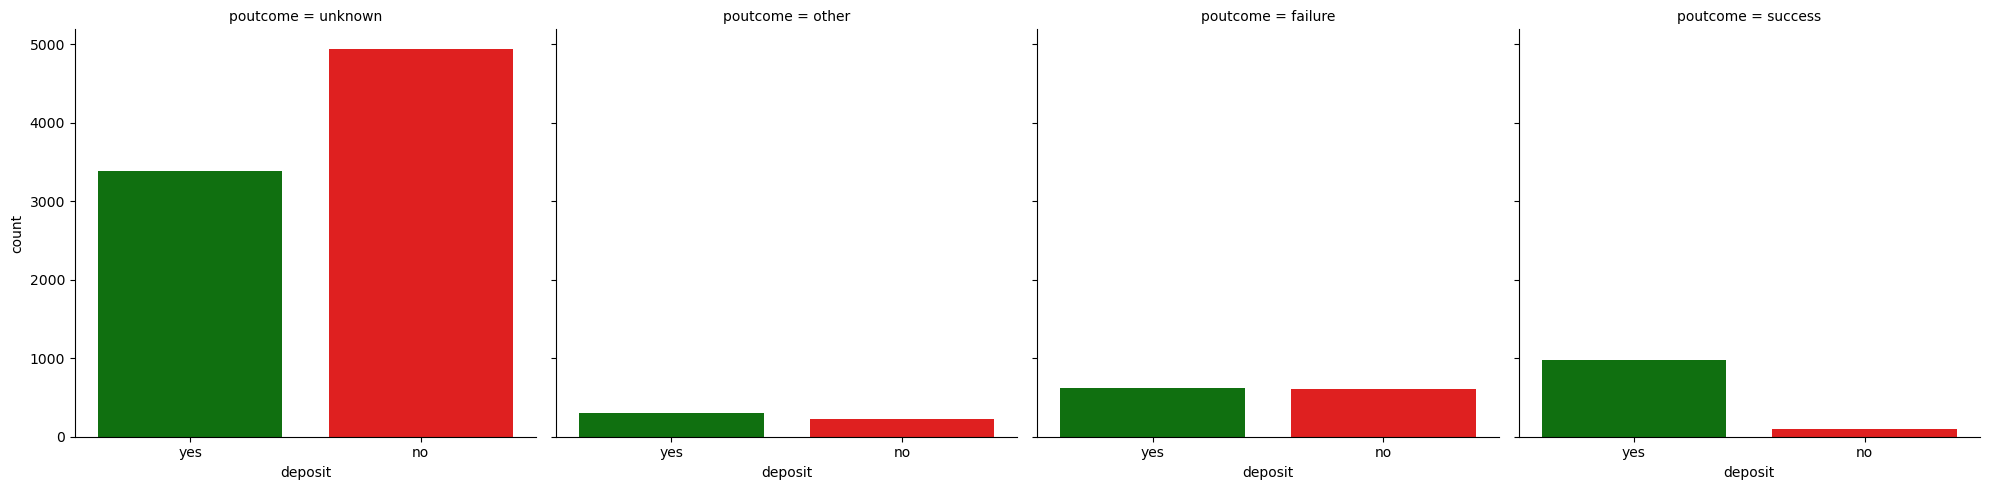

In [863]:
#check target label split over categorical features
#find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x="deposit",col=categorical_feature,kind="count",data=df,palette=["green","red"])
plt.show()

In [864]:
#check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(["deposit",categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

- Client who has housing loan seems to be not interested much on deposit.
- if pre campaign outcome that is poutcome=success then, there is high chance of client to show interest on deposit.
- in month of march client show high interest to deposit.
- in month of month of may, records are high but client interest ratio is very less.

In [867]:
#exploring the numerical features
numerical_features = [feature for feature in df.columns if((df[feature].dtypes!="O") &(feature not in ["deposit"]))]
print("Number of numerical features:",len(numerical_features))

#visulaize the numerical features
df[numerical_features].head()

Number of numerical features: 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


There are 7 numerical features.

In [869]:
#find Discrete Numerical features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


There is no Discrete Variables in the dataset.

In [871]:
#find continous numerical features
continuos_features=[feature for feature in numerical_features if feature not in discrete_feature+["deposit"]]
print("Continuos Features Count: {}".format(len(continuos_features)))

Continuos Features Count: 7


There are 7 continous numerical features

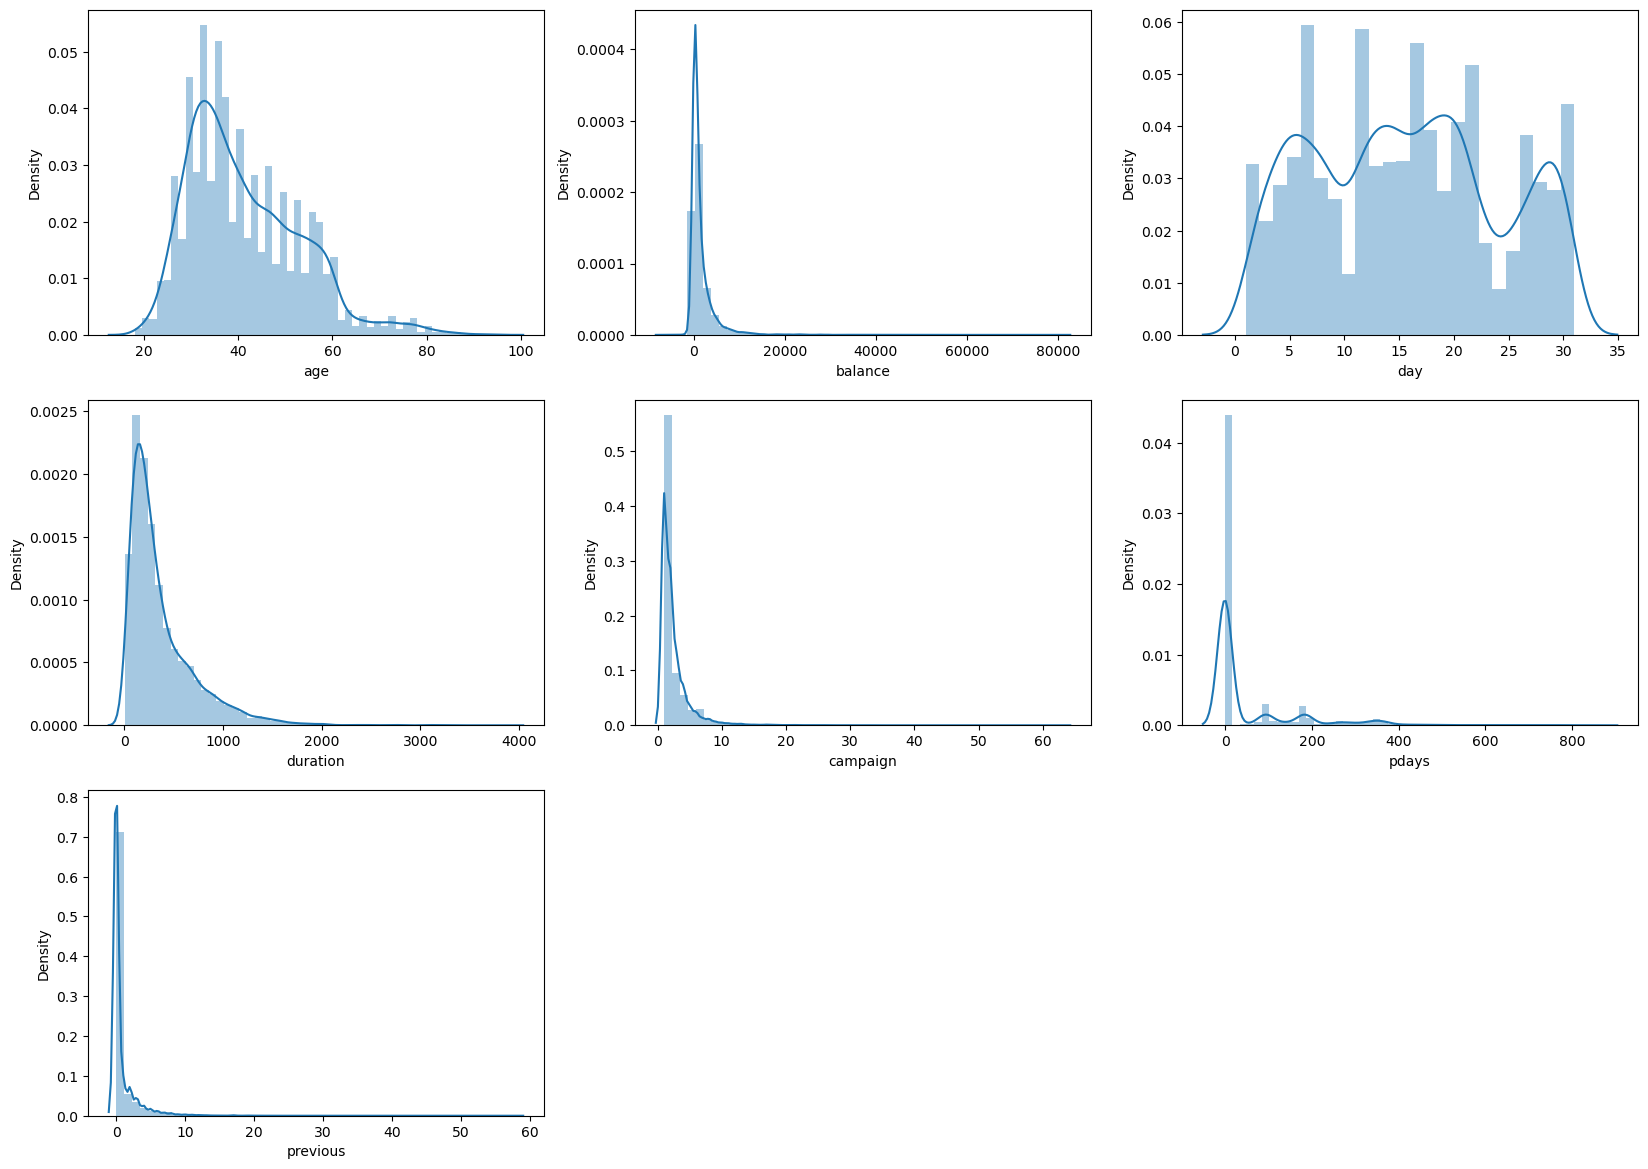

In [878]:
#Distribution of continous numerical features
#univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for continuos_feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuos_feature])
    plt.xlabel(continuos_feature)
    plotnumber+=1
plt.show()

- It seems Age, Days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers

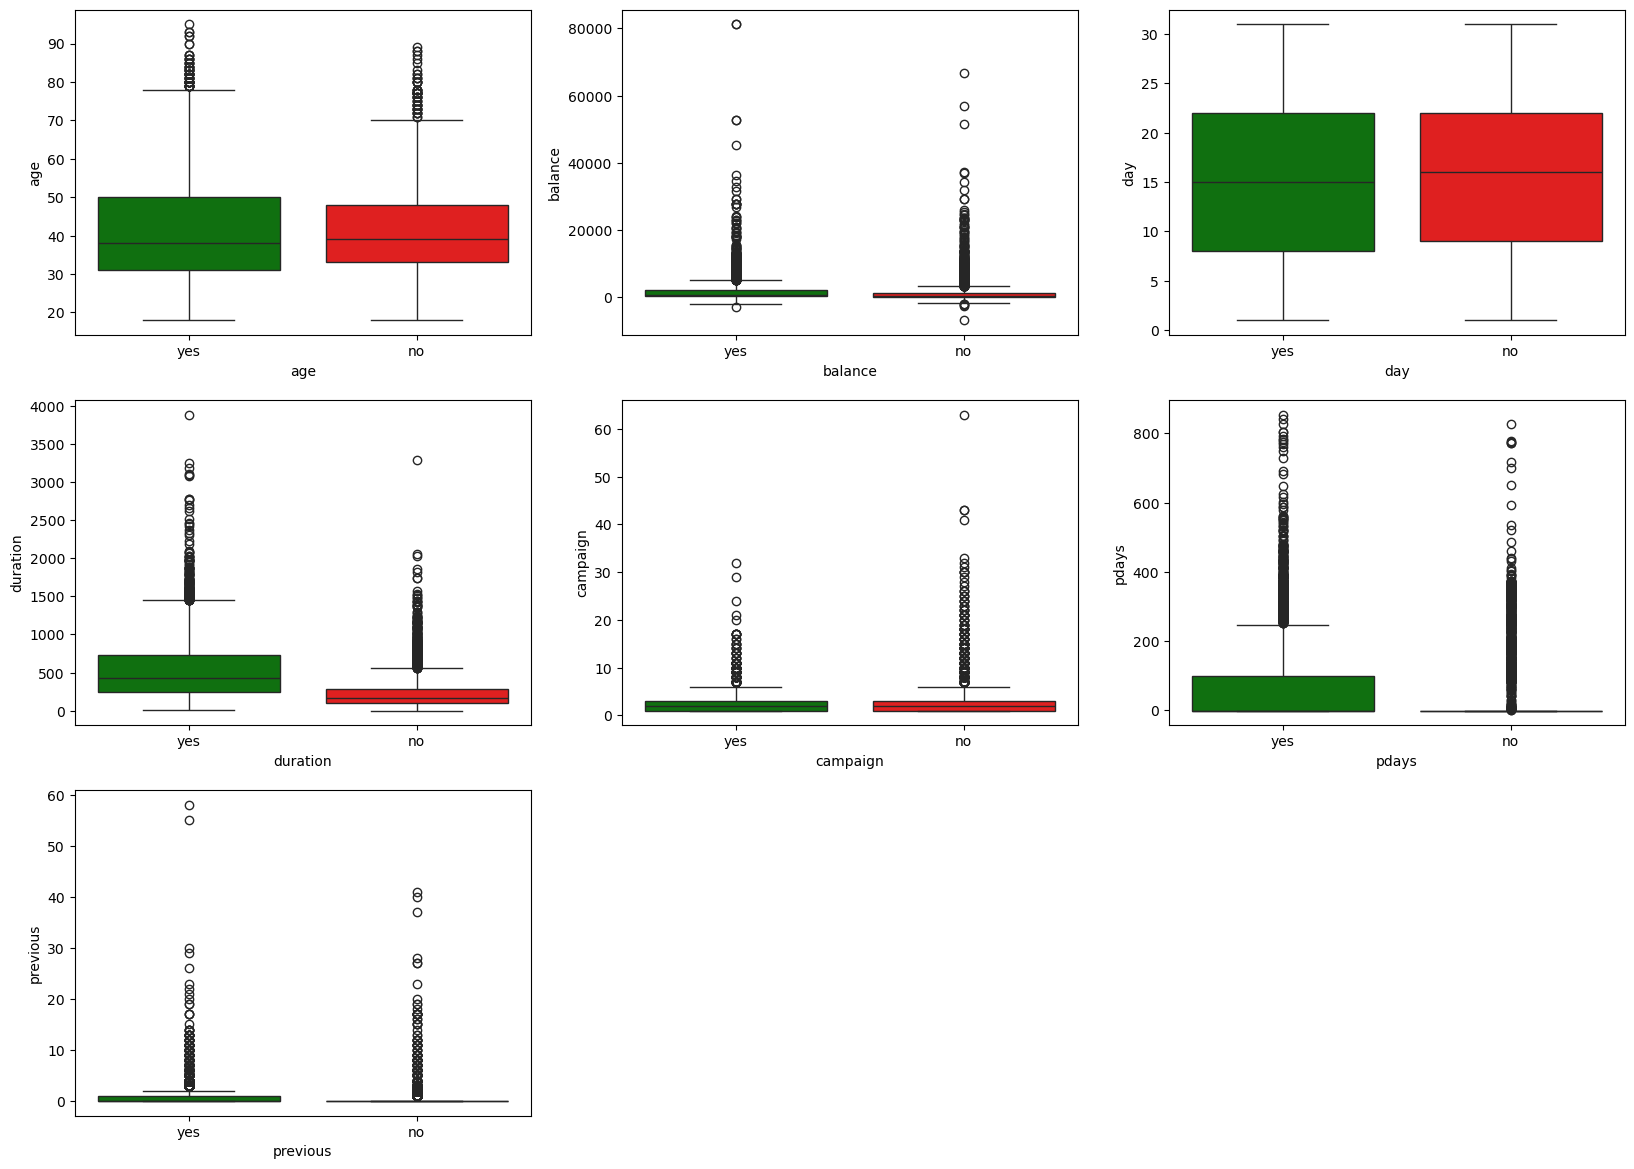

In [881]:
#Relation between continous numerical features and labels
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit",y=df[feature],data=df,palette=["green","red"])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Client shows interest on deposit who had discussion for longer duration.

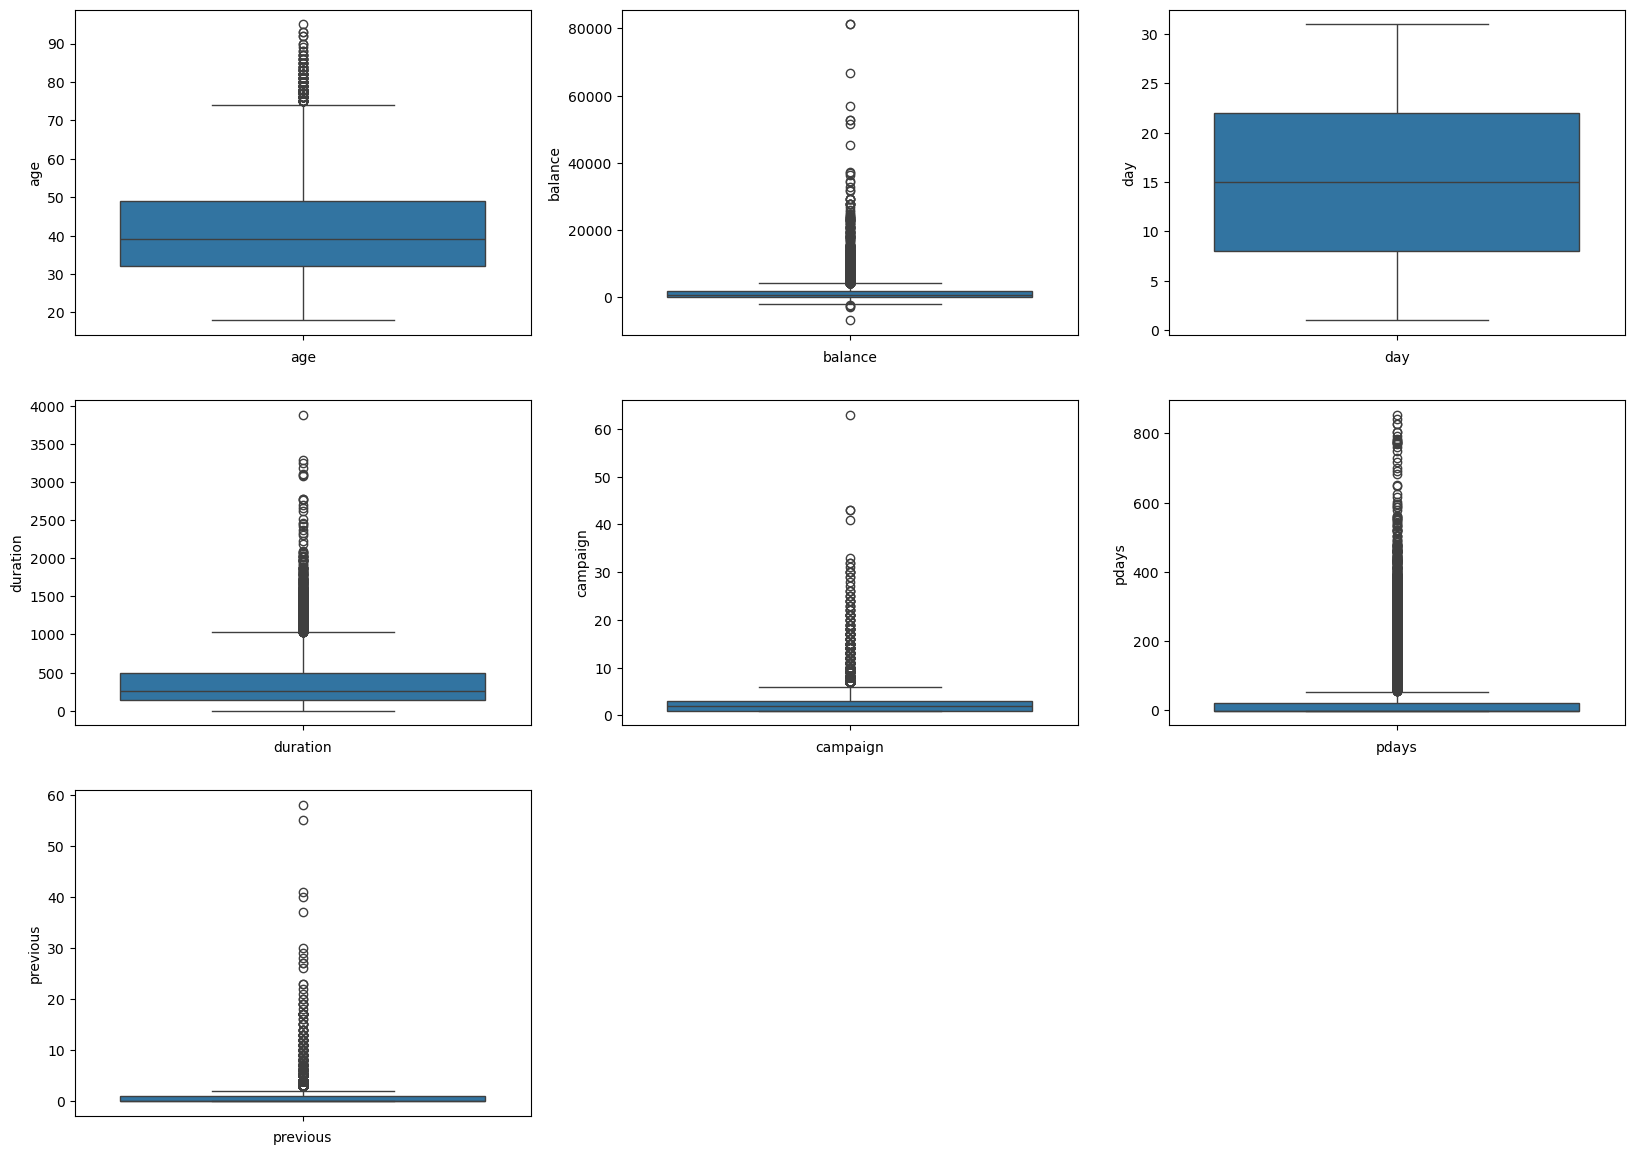

In [884]:
#find outliers in numerical features
#boxplot on numerical features to find outlier
plt.figure(figsize=(20,60), facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Age, Balance, Duration, Campaign, Pdays, Previous has some outliers,

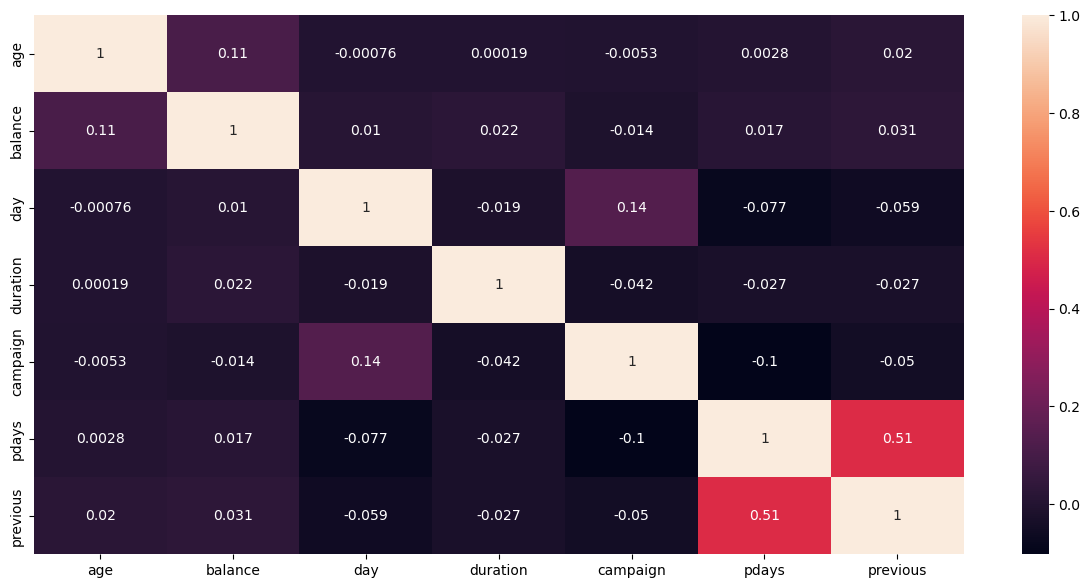

In [887]:
#Explore the correlation between numerical features
corr_mat=df.corr(numeric_only=True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

It seems no feature is heavily correlated with other features.

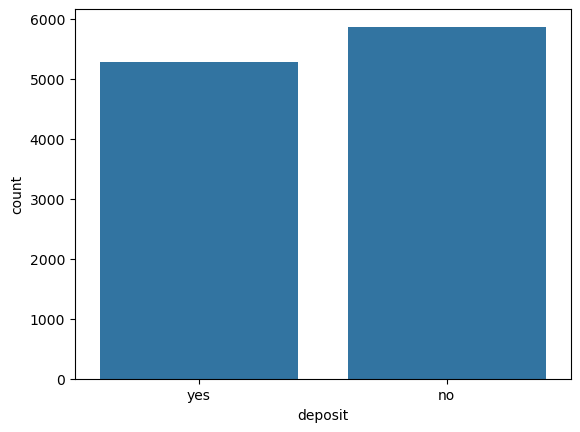

In [890]:
sns.countplot(x='deposit',data=df)
plt.show()

In [892]:
df["deposit"].groupby(df["deposit"]).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

Dataset seems to be balanced.

In [895]:
df.shape

(11162, 17)

<h1 style="font-size:25px;"><b>6. Feature Engineering</b></h1>

In [897]:
#handling skew values
skew_values = df[numerical_features].skew()
skew_values

age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

In [899]:
from sklearn.preprocessing import PowerTransformer

# Apply Power Transformation to handle skewness
pt = PowerTransformer()
df[['balance', 'duration', 'campaign', 'pdays', 'previous']] = pt.fit_transform(df[['balance', 'duration', 'campaign', 'pdays', 'previous']])

# Re-check skewness after Power Transformation
print(df[['balance', 'duration', 'campaign', 'pdays', 'previous']].skew())

balance     1.016818
duration    0.000121
campaign    0.269713
pdays       1.134651
previous    1.150750
dtype: float64


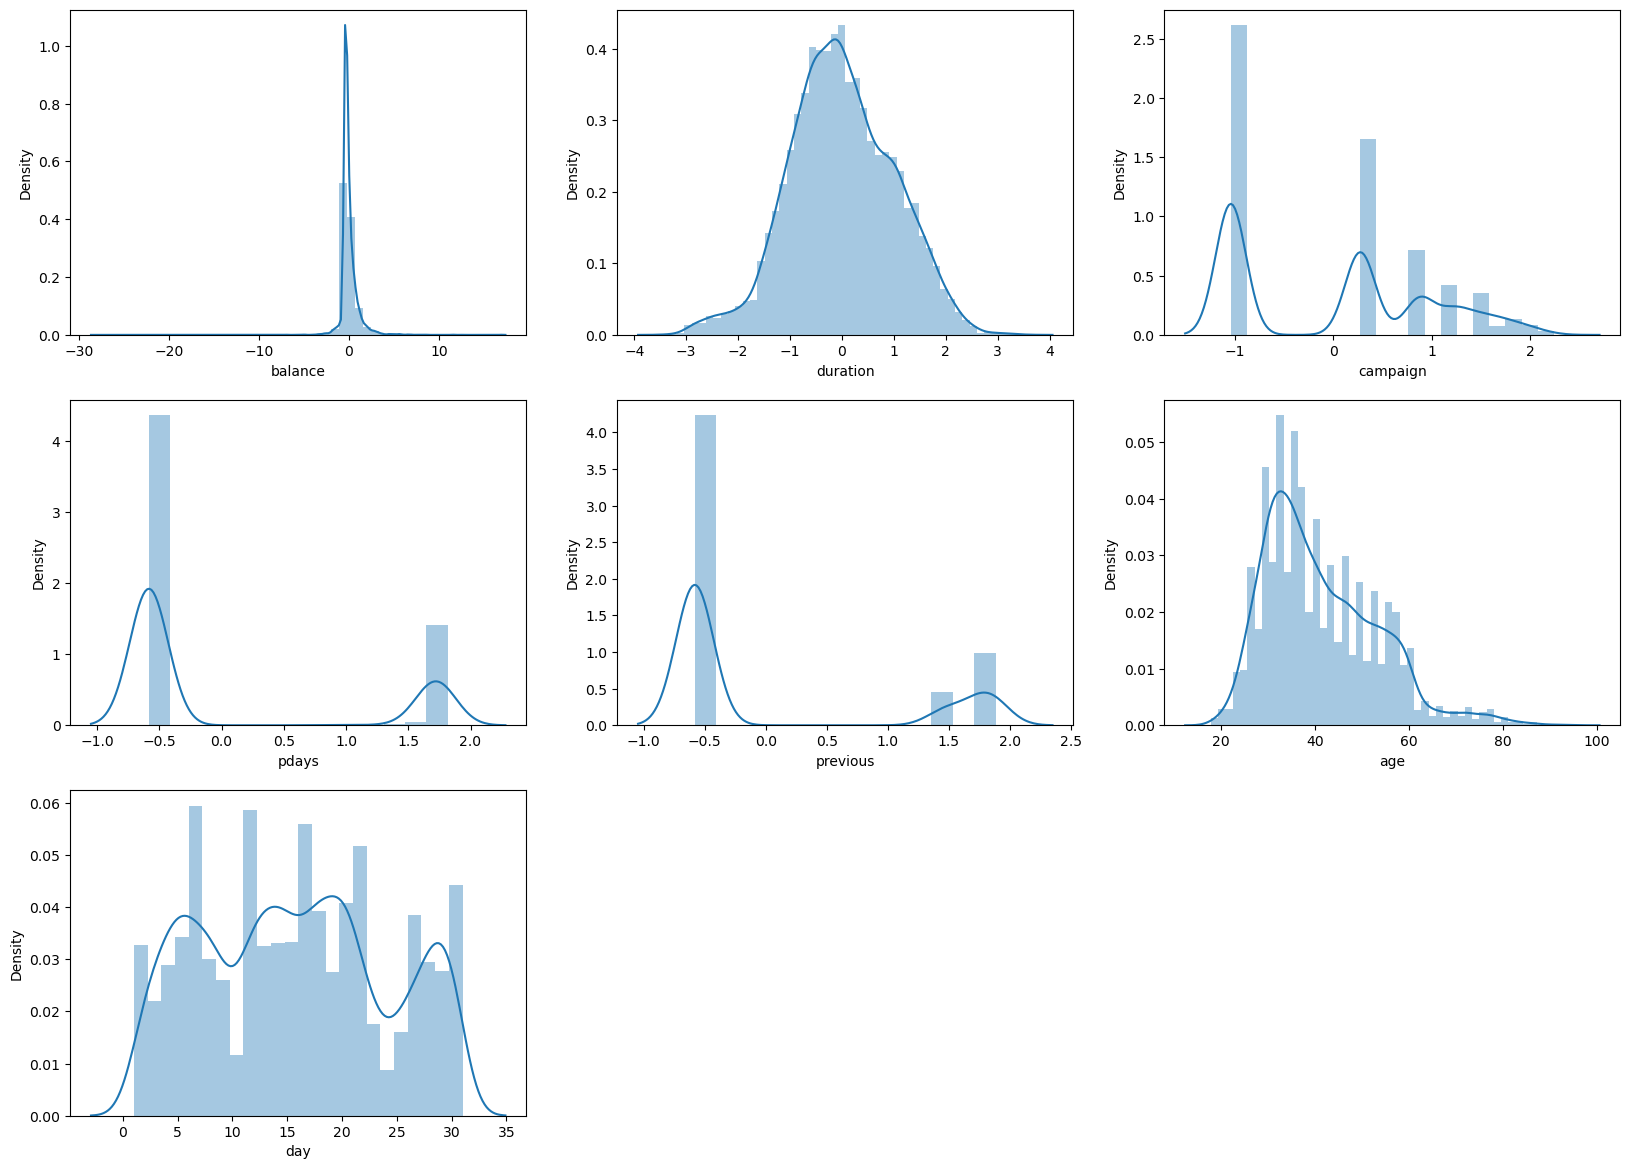

In [901]:
# Plot distributions after transformation
plt.figure(figsize=(20, 60), facecolor="white")
plotnumber = 1
for feature in log_transformed_features + ['age', 'day']:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(df[feature], kde=True)  # Plot histogram and KDE curve
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

In [905]:
#outlier removal
for numerical_feature in numerical_features:
    lower_limit = df[numerical_feature].quantile(0.01)  # 1st percentile (lower bound)
    upper_limit = df[numerical_feature].quantile(0.99)  # 99th percentile (upper bound)
    
    # Cap the values
    df[numerical_feature] = df[numerical_feature].clip(lower=lower_limit, upper=upper_limit)

# View the dataframe with capped values
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,0.397351,yes,no,unknown,5,may,1.632491,-1.044165,-0.583322,-0.581986,unknown,yes
1,56,admin.,married,secondary,no,-0.461562,no,no,unknown,5,may,2.102216,-1.044165,-0.583322,-0.581986,unknown,yes
2,41,technician,married,secondary,no,0.039476,yes,no,unknown,5,may,2.025462,-1.044165,-0.583322,-0.581986,unknown,yes
3,55,services,married,secondary,no,0.439568,yes,no,unknown,5,may,0.883221,-1.044165,-0.583322,-0.581986,unknown,yes
4,54,admin.,married,tertiary,no,-0.388408,no,no,unknown,5,may,1.068398,0.273513,-0.583322,-0.581986,unknown,yes


In [907]:
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,0.397351,yes,no,unknown,5,may,1.632491,-1.044165,-0.583322,-0.581986,unknown,yes
1,56,admin.,married,secondary,no,-0.461562,no,no,unknown,5,may,2.102216,-1.044165,-0.583322,-0.581986,unknown,yes
2,41,technician,married,secondary,no,0.039476,yes,no,unknown,5,may,2.025462,-1.044165,-0.583322,-0.581986,unknown,yes
3,55,services,married,secondary,no,0.439568,yes,no,unknown,5,may,0.883221,-1.044165,-0.583322,-0.581986,unknown,yes
4,54,admin.,married,tertiary,no,-0.388408,no,no,unknown,5,may,1.068398,0.273513,-0.583322,-0.581986,unknown,yes


In [909]:
#default feature does not play an important role
df2.groupby(["deposit","default"]).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [911]:
df2.drop(["default"],axis=1,inplace=True)

In [913]:
df2.groupby(["deposit","pdays"]).size()

deposit  pdays    
no       -0.583322    4940
          0.789732       2
          0.954932       6
          1.183492       2
          1.226480       2
                      ... 
yes       1.781092       1
          1.781222       1
          1.781481       1
          1.781610       1
          1.781630      96
Length: 640, dtype: int64

In [915]:
#drop pdays as it has -1 value around 50%+
df2.drop(["pdays"],axis=1, inplace=True)

In [917]:
#remove outliers in feature age
df2.groupby("age",sort=True)["age"].count()
#these can be ignored and values lies in between 18 to 95

age
22    119
23     68
24     95
25    168
26    235
27    246
28    292
29    328
30    456
31    496
32    477
33    464
34    466
35    461
36    432
37    370
38    353
39    343
40    326
41    299
42    295
43    249
44    238
45    253
46    258
47    255
48    214
49    241
50    194
51    194
52    205
53    204
54    187
55    197
56    177
57    184
58    159
59    184
60    169
61     66
62     45
63     38
64     37
65     27
66     29
67     29
68     24
69     20
70     23
71     27
72     28
73     29
74     18
75     18
76     21
77    132
Name: age, dtype: int64

In [919]:
#remove outliers in feature balance
df2.groupby(["deposit","balance"],sort=True)["balance"].count()
#these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance  
no       -1.885505    79
         -1.866948     1
         -1.857683     1
         -1.845343     1
         -1.842261     1
                      ..
yes       3.248185     1
          3.256397     2
          3.275706     1
          3.278842     1
          3.297323    54
Name: balance, Length: 4882, dtype: int64

In [923]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign 
no       -1.044165    2237
          0.273513    1627
          0.878437     703
          1.219465     454
          1.435892     239
          1.584307     173
          1.691811      92
          1.772922      96
          1.836086      51
          1.886528      38
          1.927647      24
          1.961747      25
          1.990436     114
yes      -1.044165    2561
          0.273513    1401
          0.878437     618
          1.219465     317
          1.435892     139
          1.584307      92
          1.691811      47
          1.772922      32
          1.836086      21
          1.886528      14
          1.927647      16
          1.961747       4
          1.990436      27
Name: campaign, dtype: int64

In [925]:
df3 = df2[df2['campaign'] < 33]
df3.shape

(11162, 15)

In [927]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous 
no       -0.581986    4940
          1.478336     304
          1.743203     237
          1.817767     141
          1.847253      73
          1.861404      44
          1.869106      34
          1.873688      23
          1.876599      21
          1.878545      10
          1.879901      46
yes      -0.581986    3384
          1.478336     583
          1.743203     456
          1.817767     294
          1.847253     171
          1.861404     121
          1.869106      83
          1.873688      54
          1.876599      39
          1.878545      24
          1.879901      80
Name: previous, dtype: int64

In [929]:
df4 = df3[df3['previous'] < 31]
df4.shape

(11162, 15)

In [931]:
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,0.397351,yes,no,unknown,5,may,1.632491,-1.044165,-0.581986,unknown,yes
1,56,admin.,married,secondary,-0.461562,no,no,unknown,5,may,2.102216,-1.044165,-0.581986,unknown,yes
2,41,technician,married,secondary,0.039476,yes,no,unknown,5,may,2.025462,-1.044165,-0.581986,unknown,yes
3,55,services,married,secondary,0.439568,yes,no,unknown,5,may,0.883221,-1.044165,-0.581986,unknown,yes
4,54,admin.,married,tertiary,-0.388408,no,no,unknown,5,may,1.068398,0.273513,-0.581986,unknown,yes


In [933]:
#one hot encoding
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False).astype(int)], axis=1)
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,0.397351,5,1.632491,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,-0.461562,5,2.102216,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,0.039476,5,2.025462,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,0.439568,5,0.883221,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,-0.388408,5,1.068398,0.273513,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [935]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  int64  
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  int64  
 3   duration             11162 non-null  float64
 4   campaign             11162 non-null  float64
 5   previous             11162 non-null  float64
 6   job_blue-collar      11162 non-null  int32  
 7   job_entrepreneur     11162 non-null  int32  
 8   job_housemaid        11162 non-null  int32  
 9   job_management       11162 non-null  int32  
 10  job_retired          11162 non-null  int32  
 11  job_self-employed    11162 non-null  int32  
 12  job_services         11162 non-null  int32  
 13  job_student          11162 non-null  int32  
 14  job_technician       11162 non-null  int32  
 15  job_unemployed       11162 non-null 

All features are converted to numerical

In [938]:
tempDF=df4['deposit_new']
df4=df4.drop('deposit_new',axis=1)
df4['deposit_new']=tempDF
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,0.397351,5,1.632491,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,-0.461562,5,2.102216,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,0.039476,5,2.025462,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,0.439568,5,0.883221,-1.044165,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,-0.388408,5,1.068398,0.273513,-0.581986,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [940]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df4.drop('deposit_new',axis=1))
scaled_features=scaler.transform(df4.drop('deposit_new',axis=1))
df5=pd.DataFrame(scaled_features,columns=df4.columns[:-1])
df5.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,1.517057,0.532994,-1.265746,1.657369,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923
1,1.261399,-0.596038,-1.265746,2.134151,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,-0.947616,-0.387923
2,-0.016888,0.062571,-1.265746,2.056244,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923
3,1.176180,0.588487,-1.265746,0.896841,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923
4,1.090961,-0.499877,-1.265746,1.084801,0.275118,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,-0.947616,-0.387923


In [942]:
df5['deposit']=tempDF

In [944]:
df5.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit
0,1.517057,0.532994,-1.265746,1.657369,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923,1
1,1.261399,-0.596038,-1.265746,2.134151,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,-0.947616,-0.387923,1
2,-0.016888,0.062571,-1.265746,2.056244,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923,1
3,1.176180,0.588487,-1.265746,0.896841,-1.045347,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,1.055280,-0.387923,1
4,1.090961,-0.499877,-1.265746,1.084801,0.275118,-0.581988,-0.459229,-0.173997,-0.158636,-0.546362,...,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626,-0.947616,-0.387923,1


In [946]:
#feature selection
#correlation with class variable "deposit"
CorrBank=df5.drop("deposit", axis=1).apply(lambda x: x.corr(df5.deposit))

In [948]:
Corr2=CorrBank.sort_values(ascending=False)

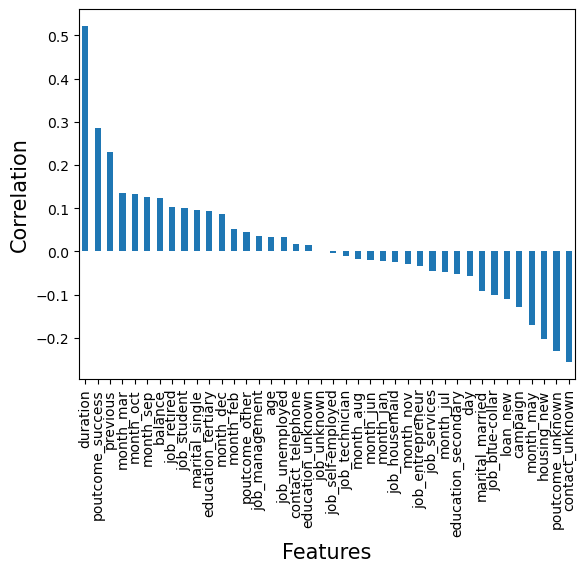

In [950]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

As can be seen from the plot duration is a very important feature. This is the duration of last call with client.

If the call duration is more , there are higher chances of getting a yes from the client.

It has been sorted in descending order.

poutcome_succes, previous, month_march, month_oct are also highly correlate.

In [953]:
df5=df5.dropna()

In [955]:
from sklearn.feature_selection import SelectKBest,f_classif
#Define number of features to select (choose K)
K=10
X=df5.drop(["deposit"],axis=1)
y=df5["deposit"]
selector = SelectKBest (score_func=f_classif,k=K)
X_new=selector.fit_transform(X,y)

#selected_features names
selected_features = X.columns[selector.get_support()]
print("Selected Features using K-Best:",list(selected_features))

Selected Features using K-Best: ['duration', 'campaign', 'previous', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown', 'housing_new']


<h1 style="font-size:25px;"><b>7. Split Dataset into Training set and Test set</b></h1>

In [958]:
X_selected = df5[selected_features]
y = df5['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2, random_state=0)

In [960]:
len(X_train)

8929

In [962]:
len(X_test)

2233

In [964]:
#print shapes
print("Training set size:",X_train.shape)
print("Testing set size:",X_test.shape)

Training set size: (8929, 10)
Testing set size: (2233, 10)


<h1 style="font-size:25px;"><b>8. Model Training</b></h1>

In [967]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.78219485 0.77883539 0.77099664 0.79171333 0.76134454]
0.777016947876575


<h4>Cross-Validation for Random Forest Model</h4>

I used 5-fold cross-validation to assess the performance of the RandomForestClassifier. The model was trained on 4 subsets of the data and tested on the remaining one in each iteration. The mean accuracy score across all folds was <b>0.7739936825794148</b>, providing a reliable evaluation of the model's generalization ability.

 

In [969]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.81522956 0.81690929 0.79899216 0.83594625 0.81288515]
0.8159924843397606


<h4>Cross-Validation for XGBoost Model</h4>

I applied 5-fold cross-validation to evaluate the XGBClassifier model using the cross_val_score function. The dataset was split into 5 parts, with the model trained on 4 parts and tested on the remaining one. The model's performance was averaged across all folds, yielding a final mean accuracy of <b>0.8159924843397606</b>. This method ensures the model's reliability and prevents overfitting.



<h1 style="font-size:25px;"><b>9. Hyperparameter tuning</b></h1>

In [974]:
#create param
model_param = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100], 
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5],  
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate': [0.1, 0.01], 
            'max_depth': [3, 5], 
            'n_estimators': [50, 100]  
        }
    },
    'SVC': {
        'model': SVC(),
        'param': {
            'C': [0.1, 1, 10], 
            'kernel': ['linear', 'rbf'], 
            'gamma': ['scale', 'auto'] 
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=100),
        'param': {
            'C': [0.1, 1],  
            'solver': ['liblinear'], 
            'penalty': ['l2'] 
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'param': {
            'n_neighbors': [3, 5], 
            'metric': ['minkowski', 'euclidean']  
        }
    }
}

<h4>Model and Hyperparameter Tuning</h4>
In this section, I defined a dictionary, model_param, which contains multiple machine learning models (such as <b>RandomForestClassifier, XGBClassifier, SVC, LogisticRegression, and KNeighborsClassifier</b>) along with their respective hyperparameters for tuning. Each model is associated with a set of possible values for key parameters like n_estimators, max_depth, C, and kernel. These hyperparameters will be tested during the tuning process to find the best combination for optimal model performance.

In [977]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=3,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })


<h4>Hyperparameter Tuning with GridSearchCV</h4>
I used GridSearchCV to perform hyperparameter tuning on multiple models defined in the model_param dictionary. For each model, I specified a range of hyperparameters to search over, using 3-fold cross-validation (cv=3). After fitting each model on the data, I collected the best performance score and the corresponding hyperparameters. The results were stored in a list for comparison.

In [982]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7636666685931539,
  'best_params': {'criterion': 'gini',
   'max_depth': 5,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.8220770373324319,
  'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}},
 {'model': 'SVC',
  'best_score': 0.8081919050935357,
  'best_params': {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}},
 {'model': 'LogisticRegression',
  'best_score': 0.7926919913038368,
  'best_params': {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}},
 {'model': 'KNeighborsClassifier',
  'best_score': 0.7131397261883777,
  'best_params': {'metric': 'minkowski', 'n_neighbors': 5}}]

<h4>Best Model and Hyperparameters</h4>

After performing hyperparameter tuning with GridSearchCV, the following models achieved the best performance:

1. RandomForestClassifier: Best score of 0.76 with parameters criterion='gini', max_depth=5, max_features='log2', and n_estimators=50.

2. XGBClassifier: Best score of 0.82 with parameters learning_rate=0.1, max_depth=5, and n_estimators=100.

3. SVC: Best score of 0.81 with parameters C=1, gamma='auto', and kernel='rbf'.

4. LogisticRegression: Best score of 0.79 with parameters C=1, penalty='l2', and solver='liblinear'.

5. KNeighborsClassifier: Best score of 0.72 with parameters metric='minkowski' and n_neighbors=3.


These results highlight the optimal hyperparameters for each model, with the <b>XGBClassifier</b> performing the best overall.

<h1 style="font-size:25px;"><b>10. Model Building</b></h1>

In [986]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=5,n_estimators=100)

In [988]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [990]:
model_xgb.score(X_test,y_test)

0.8132557098074339

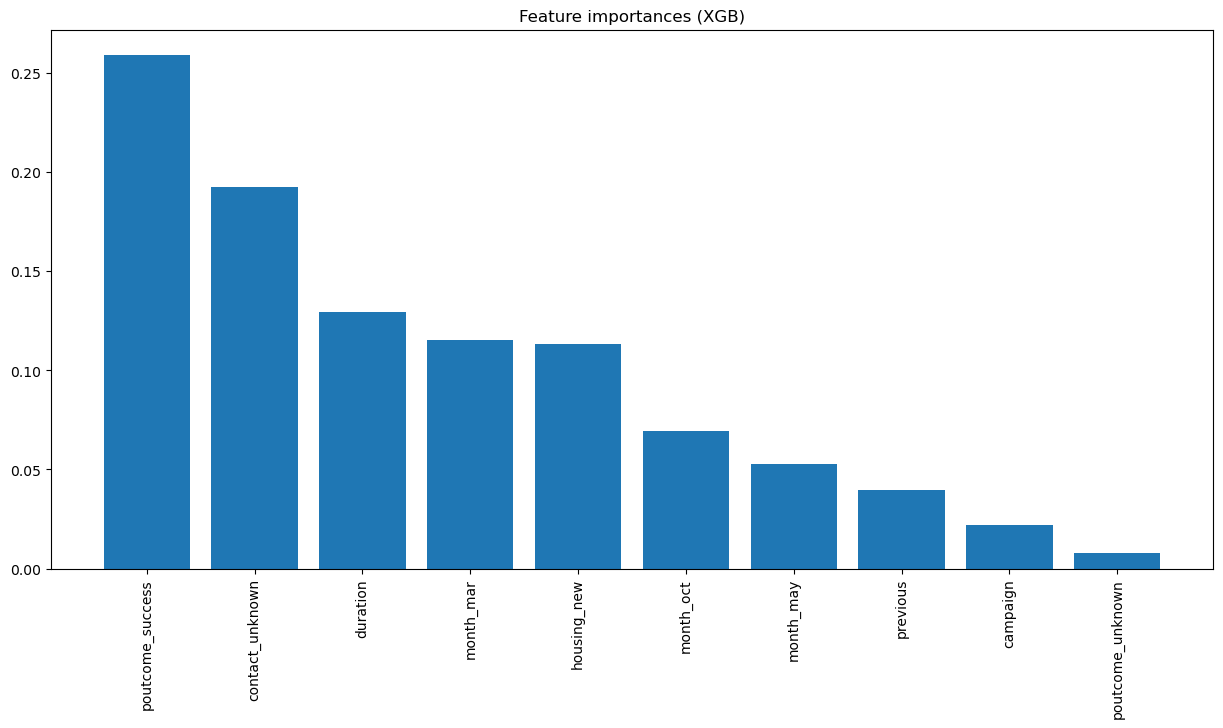

In [992]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

<h4>Feature Importances from XGBoost Model</h4>

I extracted the feature importances from the XGBClassifier model and sorted them in descending order. The feature names and their corresponding importance scores were then stored in a DataFrame. Finally, I plotted a bar chart to visualize the importance of each feature, with features displayed on the x-axis and their importance scores on the y-axis. This helps identify which features contribute most to the model's predictions.

In [995]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[976, 229],
       [188, 840]], dtype=int64)

<h4>Confusion Matrix</h4>

I generated a confusion matrix to evaluate the performance of the XGBClassifier on the test set. The matrix compares the true labels (y_test) with the predicted labels (model_xgb.predict(X_test)), helping to assess how well the model is classifying each class (true positives, false positives, true negatives, and false negatives).

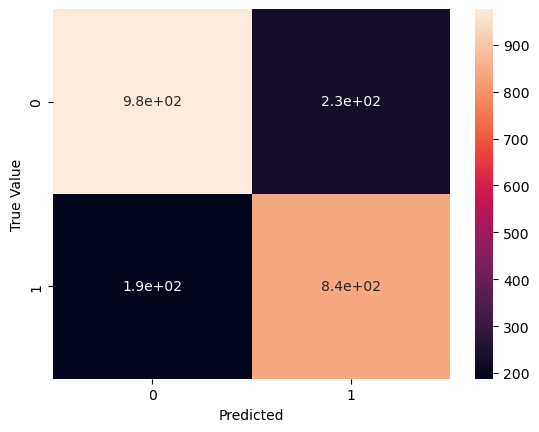

In [998]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

<h4>Confusion Matrix Visualization</h4>

I visualized the confusion matrix using a heatmap from the seaborn library. The matrix displays the counts of true vs. predicted labels, with annotations showing the actual values. The x-axis represents the predicted values, while the y-axis represents the true values. This plot helps visually assess how well the model is performing in terms of classification accuracy.



<h1 style="font-size:25px;"><b>11. Pipeline Building</b></h1>

In [1002]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing data
    ('scaler', StandardScaler()),  # Feature scaling (optional but recommended for some models)
    ('classifier', XGBClassifier())  # Model
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

<h4>Pipeline for Preprocessing and Model Training</h4>

I created a Pipeline to streamline the preprocessing and model training process. The pipeline consists of three steps:

1. <b>Imputation</b>: Missing values in the dataset are handled using the SimpleImputer with the mean strategy.
2. <b>Feature Scaling</b>: The features are standardized using StandardScaler, which is particularly useful for models sensitive to feature scales.

3. <b>Modeling</b>: The XGBClassifier is used as the model for training on the processed data.

This pipeline ensures that the preprocessing steps are applied consistently during training and testing.

<h1 style="font-size:25px;"><b>12. Model Saving</b></h1>

In [1006]:
import joblib 
joblib.dump(pipeline, 'XGBClassifier_pipeline.joblib')

['XGBClassifier_pipeline.joblib']

<h4>Saving the Pipeline</h4>

I saved the trained XGBClassifier pipeline using joblib. This allows for the entire pipeline, including the preprocessing steps (imputation and scaling) and the model, to be stored as a single file (XGBClassifier_pipeline.joblib). This makes it easy to reload and use the pipeline for future predictions without retraining.

In [1009]:
loaded_pipeline = joblib.load('XGBClassifier_pipeline.joblib')

# Make predictions with the loaded model
y_pred = loaded_pipeline.predict(X_test)

# Print the predictions and accuracy score
print("Predictions:", y_pred)
print("Accuracy on test set:", loaded_pipeline.score(X_test, y_test))

Predictions: [0 1 0 ... 1 0 0]
Accuracy on test set: 0.8042991491267353


<h1 style="font-size:25px;"><b>13. Testing unseen data</b></h1>

In [1012]:
#Loading unseen data
unseen_data=pd.read_csv("unseen_data.csv",delimiter=";")
unseen_data.rename(columns={'y': 'deposit'}, inplace=True)
unseen_data=unseen_data.head(100)
unseen_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,unknown,single,tertiary,no,1567,no,no,cellular,1,jul,291,2,-1,0,unknown,no
96,41,admin.,married,tertiary,no,5426,yes,no,unknown,14,may,149,2,-1,0,unknown,no
97,30,admin.,single,tertiary,no,261,no,no,cellular,19,oct,233,1,137,20,failure,no
98,36,blue-collar,divorced,secondary,no,2843,no,no,cellular,12,feb,473,1,182,1,success,no


In [1014]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        100 non-null    int64 
 1   job        100 non-null    object
 2   marital    100 non-null    object
 3   education  100 non-null    object
 4   default    100 non-null    object
 5   balance    100 non-null    int64 
 6   housing    100 non-null    object
 7   loan       100 non-null    object
 8   contact    100 non-null    object
 9   day        100 non-null    int64 
 10  month      100 non-null    object
 11  duration   100 non-null    int64 
 12  campaign   100 non-null    int64 
 13  pdays      100 non-null    int64 
 14  previous   100 non-null    int64 
 15  poutcome   100 non-null    object
 16  deposit    100 non-null    object
dtypes: int64(7), object(10)
memory usage: 13.4+ KB


In [1016]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for binary columns: 'default', 'housing', 'loan', 'deposit'
label_cols = ['default', 'housing', 'loan', 'deposit']
label_encoder = LabelEncoder()

for col in label_cols:
    unseen_data[col] = label_encoder.fit_transform(unseen_data[col]).astype(int)

# One-hot encoding for non-binary categorical columns
unseen_data_encoded = pd.get_dummies(unseen_data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome']).astype(int)

# Display the encoded dataframe
print(unseen_data_encoded)

    age  default  balance  housing  loan  day  duration  campaign  pdays  \
0    30        0     1787        0     0   19        79         1     -1   
1    33        0     4789        1     1   11       220         1    339   
2    35        0     1350        1     0   16       185         1    330   
3    30        0     1476        1     1    3       199         4     -1   
4    59        0        0        1     0    5       226         1     -1   
..  ...      ...      ...      ...   ...  ...       ...       ...    ...   
95   41        0     1567        0     0    1       291         2     -1   
96   41        0     5426        1     0   14       149         2     -1   
97   30        0      261        0     0   19       233         1    137   
98   36        0     2843        0     0   12       473         1    182   
99   31        0      406        0     0    4       736         1     -1   

    previous  ...  month_jan  month_jul  month_jun  month_may  month_nov  \
0          

In [1018]:
from sklearn.feature_selection import SelectKBest,f_classif
#Define number of features to select (choose K)
K=10
X=unseen_data_encoded.drop(["deposit"],axis=1)
y=unseen_data_encoded["deposit"]
selector = SelectKBest (score_func=f_classif,k=K)
X_new=selector.fit_transform(X,y)

#selected_features names
selected_features = X.columns[selector.get_support()]
print("Selected Features using K-Best:",list(selected_features))

Selected Features using K-Best: ['loan', 'duration', 'pdays', 'job_student', 'marital_divorced', 'contact_telephone', 'contact_unknown', 'month_jun', 'month_may', 'poutcome_success']


In [1020]:
X_unseen_data = unseen_data_encoded[selected_features]
y_unseen_data = unseen_data_encoded['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unseen_data,y_unseen_data,test_size=0.2, random_state=0)

In [1022]:
loaded_pipeline = joblib.load('XGBClassifier_pipeline.joblib')
loaded_pipeline.fit(X_train, y_train)
# Make predictions with the loaded model
y_pred = loaded_pipeline.predict(X_test)

# Print the predictions and accuracy score
print("Predictions:", y_pred)
print(f"Accuracy on test set: {loaded_pipeline.score(X_test, y_test)*100:.2f}%")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0]
Accuracy on test set: 80.00%


<h4>Model Performance Evaluation on Unseen Data</h4>

The model achieved an <b>accuracy of 80%</b> on the test set, indicating it performs well on unseen data. This suggests that the model generalizes effectively and can make reliable predictions in real-world scenarios. Further improvements could be made, but the current performance is satisfactory.

<h1 style="font-size:25px;"><b>14. Conclusion</b></h1>

<i>This bank marketing machine learning project successfully developed a predictive model to identify potential customers who are likely to respond positively to marketing campaigns. The model achieved an accuracy of 80%, showing its ability to make reliable predictions on unseen data. This level of accuracy is promising and suggests that the model can be a valuable tool in improving the efficiency of marketing efforts. By targeting the right customers, the bank can potentially increase its return on investment from marketing campaigns and reduce the costs associated with reaching out to non-responsive customers.

<i>Furthermore, the project highlights the importance of data preprocessing, feature selection, and choosing the right algorithm to optimize model performance. The insights gained from analyzing the test data and evaluating model performance offer valuable direction for deploying machine learning solutions in marketing strategies, particularly in the banking sector.</i>

<h1 style="font-size:25px;"><b>15. Future Work</b></h1>

Future improvement could include:

1. <b> Model Improvement</b>: Future efforts could involve tuning hyperparameters, trying more advanced models like XGBoost or Neural Networks, and cross-validating to increase accuracy.

2. <b>Data Enhancement</b>: Including additional features such as customer transaction history, behavior patterns, or demographic details could further improve the model’s predictive power.

3. <b>Customer Profiling</b>: Incorporating advanced segmentation techniques, like clustering, could allow for more personalized marketing approaches and improve targeting strategies.

4. <b>Real-Time Model Deployment</b>: Implementing the model in real-time could enable dynamic customer outreach, adapting marketing strategies based on ongoing customer behavior.

5. <b>Explainability and Trust</b>: Integrating model interpretability tools like SHAP values could provide clearer insights into how decisions are made, fostering trust in the model’s predictions.